Decision Tree Results:
MSE: 2.20318616911541, MAE: 1.0973558368190122, RMSE: 1.4843133662119365
Feature Importance (Decision Tree):
3w               0.845426
Q1+Q2            0.044529
Speed            0.030403
Temp.            0.024022
Heavy traffic    0.016117
2w               0.013138
LCV              0.010031
Car              0.008202
WS               0.004762
RH               0.003369
dtype: float64

Random Forest Results:
MSE: 0.9241132928366212, MAE: 0.7429888348395276, RMSE: 0.961308115453428
Feature Importance (Random Forest):
3w               0.432937
WS               0.418876
Q1+Q2            0.029973
Speed            0.028454
Heavy traffic    0.025616
Temp.            0.017222
2w               0.014966
RH               0.011742
Car              0.011349
LCV              0.008864
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.6507533066726601
Random Forest R²: 0.8535105583416889


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\2678822345.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


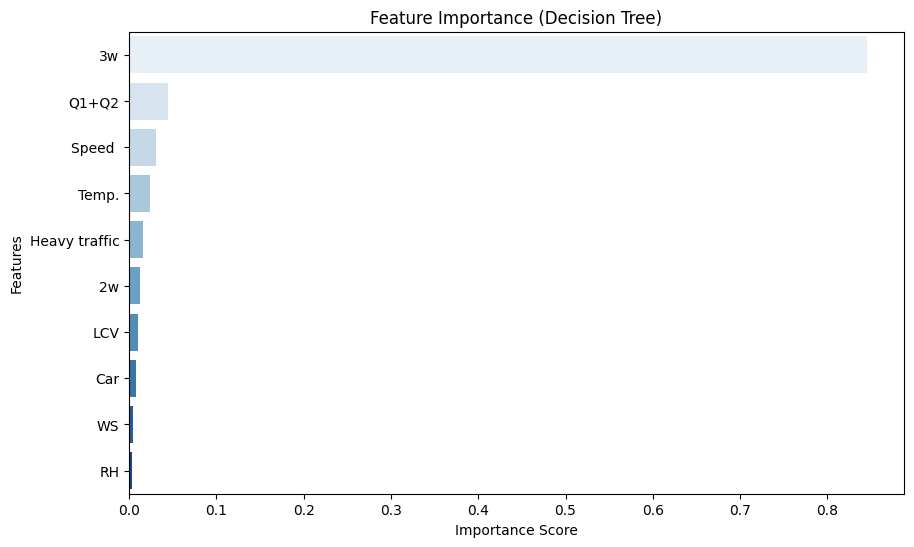

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\2678822345.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


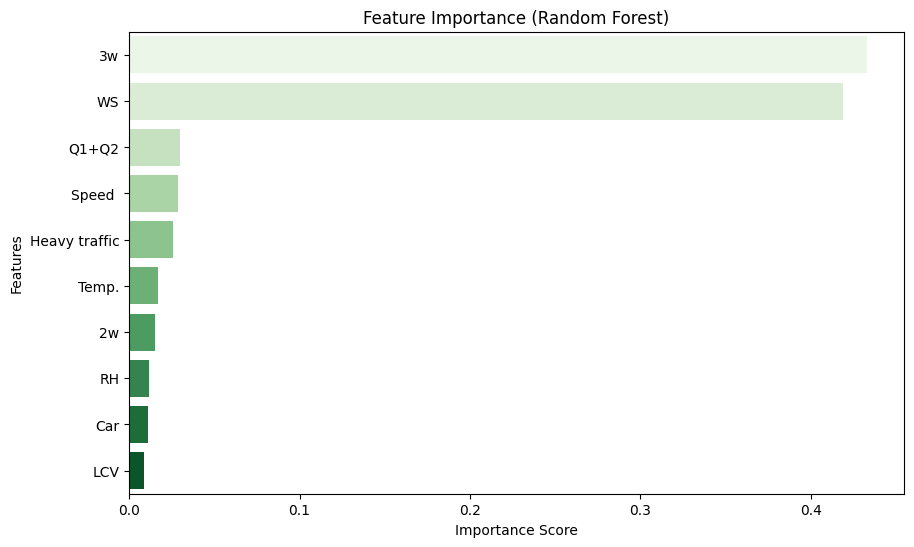

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\2678822345.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


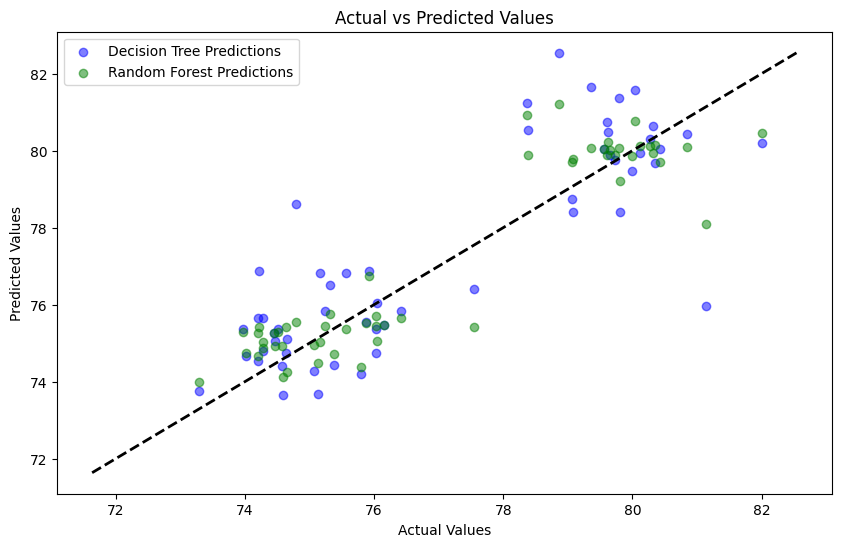

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


Decision Tree Results:
MSE: 0.49928077618201966, MAE: 0.40624620157093844, RMSE: 0.7065980301288843
Feature Importance (Decision Tree):
3w               0.940677
2w               0.020876
WS               0.009196
RH               0.008538
Car              0.005207
LCV              0.005015
Heavy traffic    0.004187
Speed            0.003145
Q1+Q2            0.002604
Temp.            0.000554
dtype: float64

Random Forest Results:
MSE: 0.2864761949114374, MAE: 0.33714226222861327, RMSE: 0.535234710114579
Feature Importance (Random Forest):
3w               0.537810
WS               0.408789
2w               0.016829
RH               0.006713
Speed            0.006371
Q1+Q2            0.006249
Car              0.005850
Heavy traffic    0.005624
Temp.            0.003346
LCV              0.002420
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.9001022251099217
Random Forest R²: 0.9426808805869269


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1262595543.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


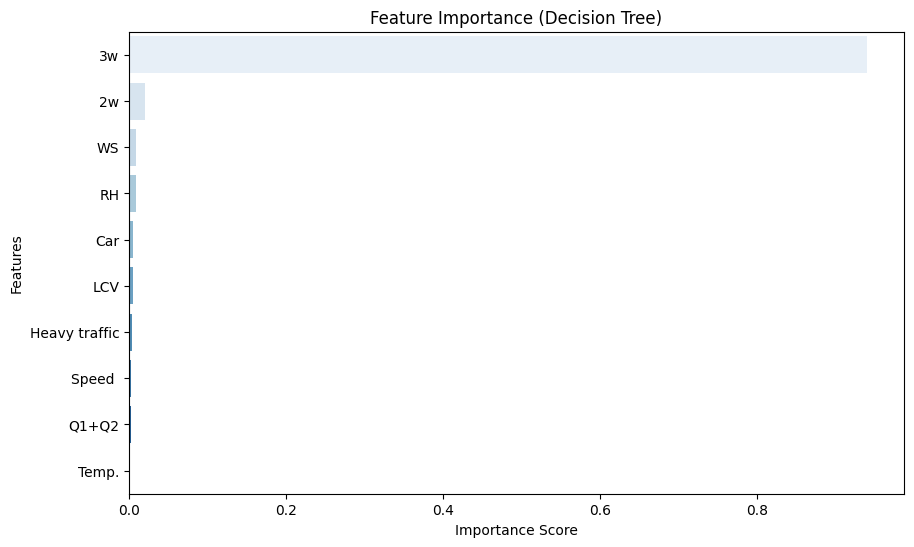

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1262595543.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


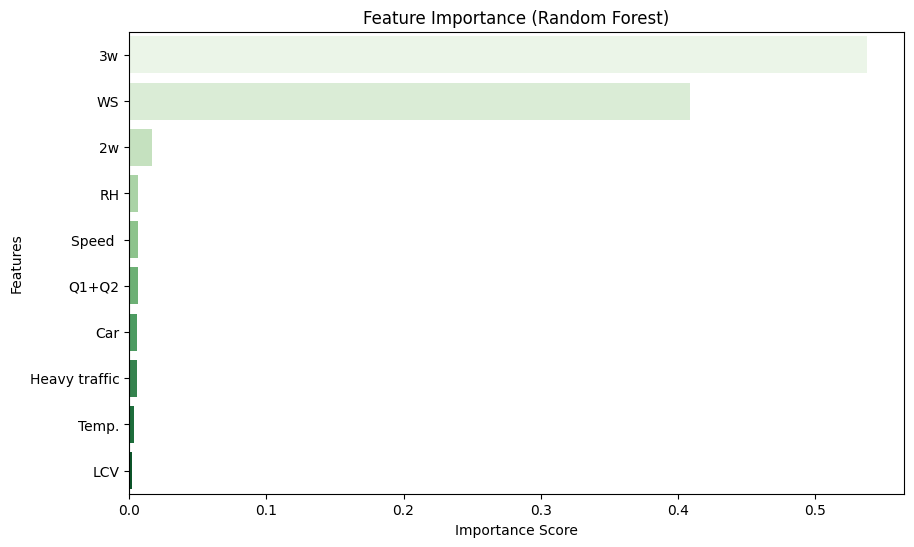

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1262595543.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


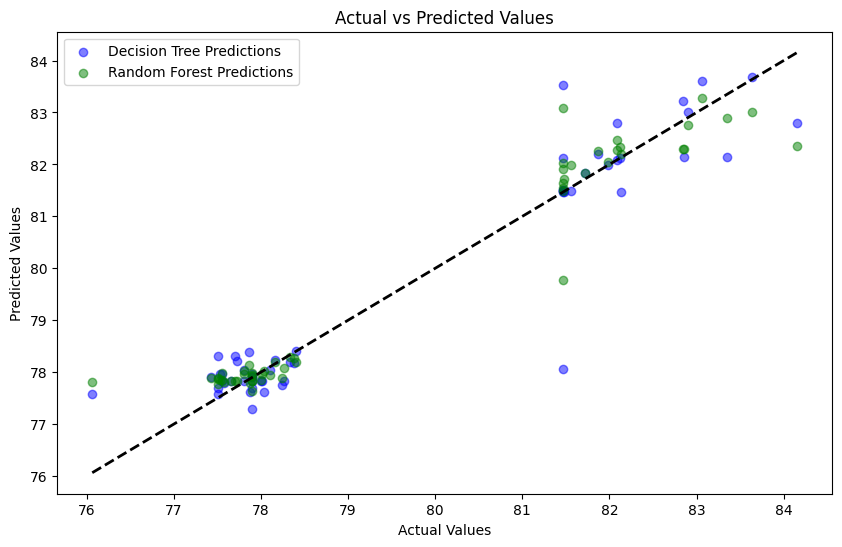

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['L10']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


Decision Tree Results:
MSE: 1.1001753165412993, MAE: 0.48816026868424417, RMSE: 1.0488924237219466
Feature Importance (Decision Tree):
3w               0.974466
2w               0.007441
Car              0.005499
WS               0.004166
Temp.            0.002178
Heavy traffic    0.001719
LCV              0.001557
RH               0.001440
Q1+Q2            0.000958
Speed            0.000578
dtype: float64

Random Forest Results:
MSE: 0.30392991482532483, MAE: 0.30939623998127763, RMSE: 0.5512983900079201
Feature Importance (Random Forest):
WS               0.545634
3w               0.429522
2w               0.007832
Car              0.004792
Heavy traffic    0.002974
RH               0.001996
Speed            0.001878
LCV              0.001860
Q1+Q2            0.001781
Temp.            0.001732
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.9059577607332217
Random Forest R²: 0.9740202771861936


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\291932254.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


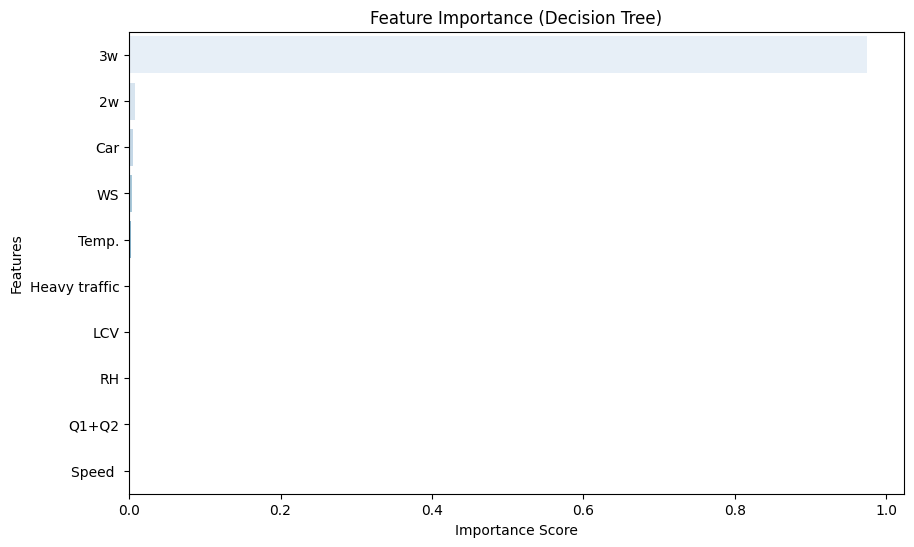

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\291932254.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


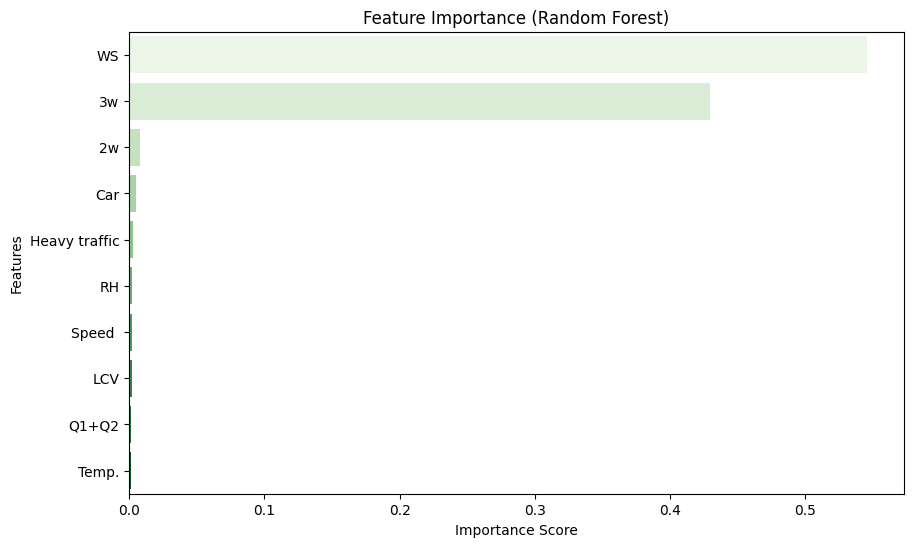

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\291932254.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


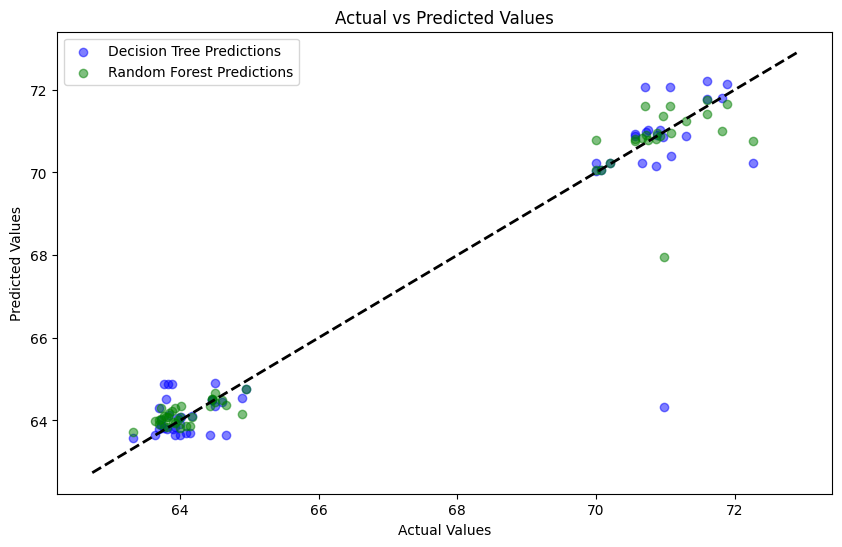

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['L90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()



XGBoost Results:
MSE: 1.603886113699456, MAE: 0.9024890616992847, RMSE: 1.2664462537744963
Feature Importance (XGBoost):
3w               0.909211
Heavy traffic    0.016361
Speed            0.013140
2w               0.011677
Q1+Q2            0.011170
Temp.            0.010737
WS               0.009201
RH               0.007238
Car              0.005959
LCV              0.005305
dtype: float32

SVM Results:
MSE: 1.016368616163234, MAE: 0.8014105522455253, RMSE: 1.0081510879641176
Feature Importance (SVM):
WS               1.215737
3w               0.908975
Heavy traffic    0.281030
Speed            0.130290
Temp.            0.126282
RH               0.112381
LCV              0.090927
2w               0.063550
Q1+Q2            0.010752
Car              0.003616
dtype: float64

Accuracy (R² Scores):
XGBoost R²: 0.745753704550498
SVM R²: 0.8388863440717707


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\3679466231.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


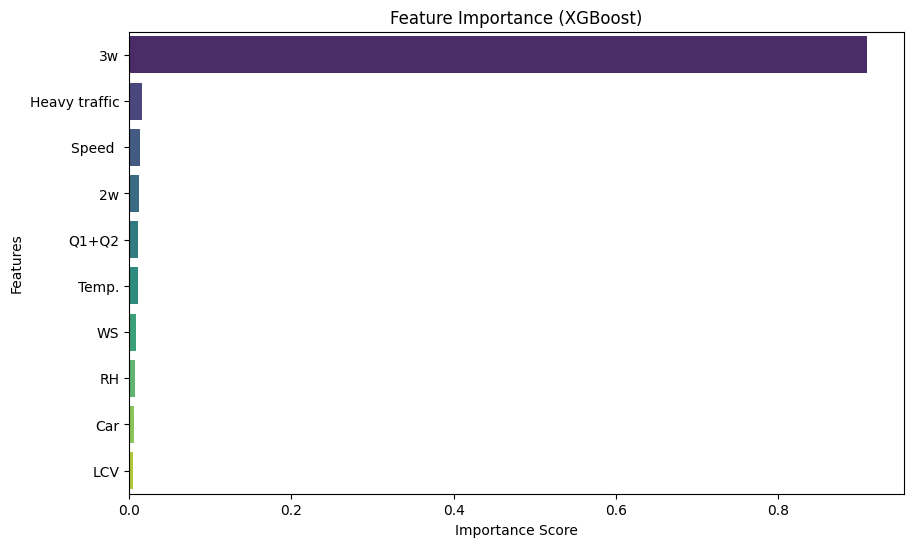

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\3679466231.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


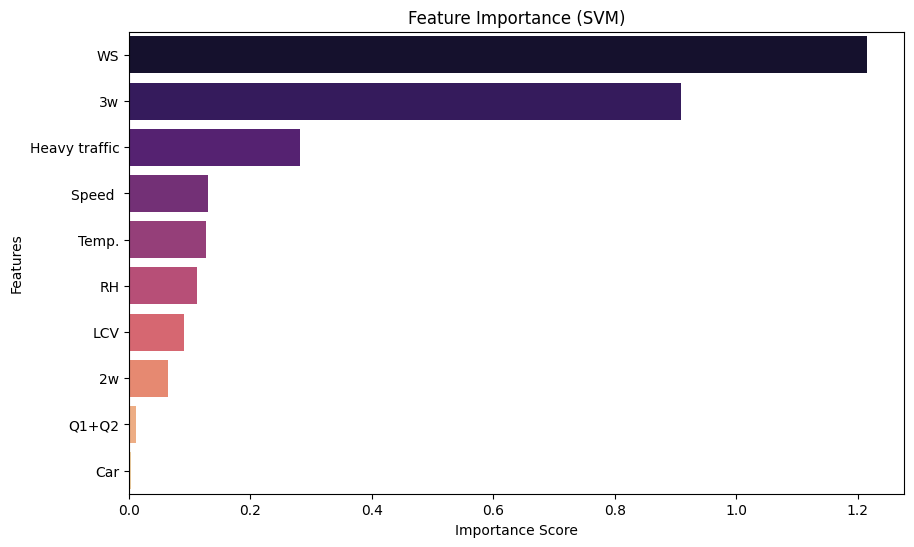

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\3679466231.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


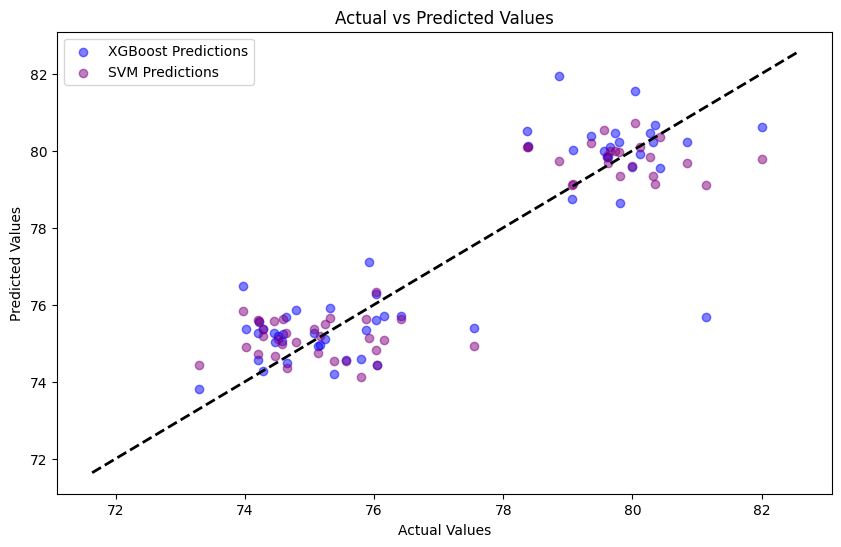

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Define features (X) and target (y)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- XGBoost Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()




XGBoost Results:
MSE: 0.43441536369280287, MAE: 0.3680774428666741, RMSE: 0.6591019372546275
Feature Importance (XGBoost):
3w               0.976561
WS               0.005594
2w               0.005407
RH               0.004614
Heavy traffic    0.001904
Speed            0.001893
Q1+Q2            0.001632
Car              0.000839
LCV              0.000796
Temp.            0.000760
dtype: float32

SVM Results:
MSE: 0.5944159710148074, MAE: 0.6075252341159116, RMSE: 0.7709837683212322
Feature Importance (SVM):
3w               1.213919
WS               0.849146
2w               0.188086
Temp.            0.185552
RH               0.154333
Car              0.072526
Speed            0.068120
LCV              0.044097
Heavy traffic    0.040150
Q1+Q2            0.036574
dtype: float64

Accuracy (R² Scores):
XGBoost R²: 0.9130807147376447
SVM R²: 0.8810672557481836


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\145673777.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


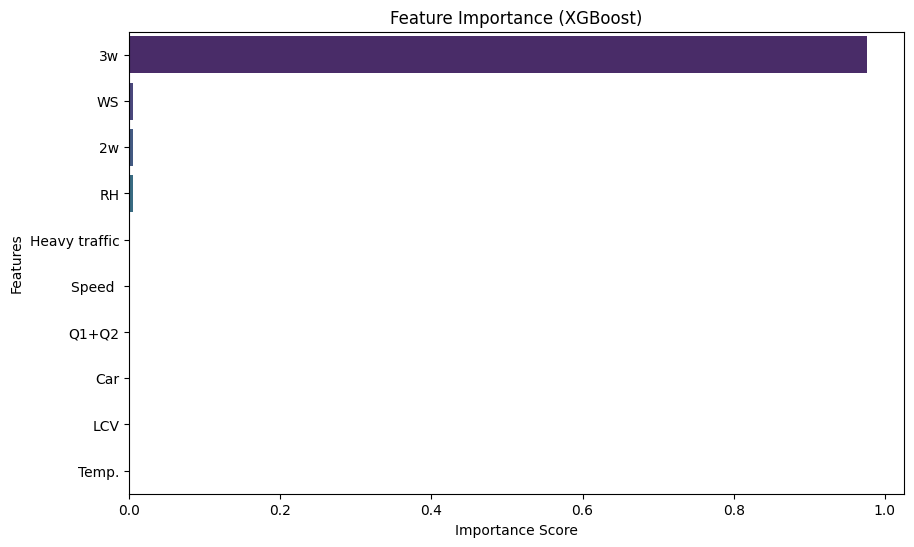

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\145673777.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


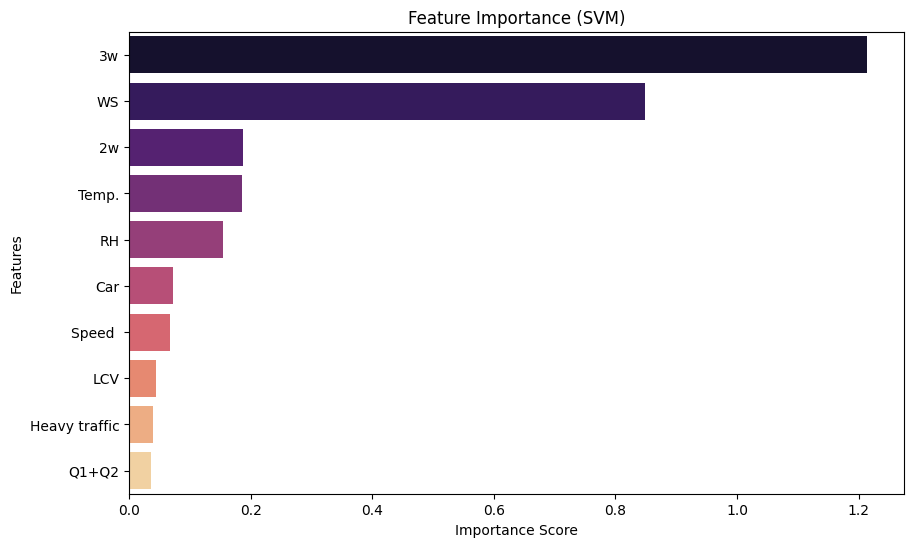

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\145673777.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


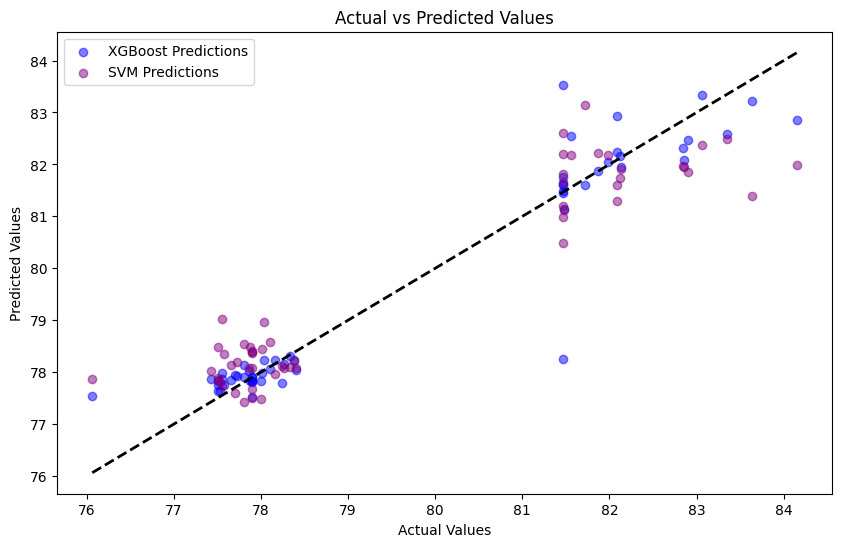

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Define features (X) and target (y)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['L10']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- XGBoost Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()




XGBoost Results:
MSE: 0.9769105152211062, MAE: 0.38674373085422203, RMSE: 0.9883878364392725
Feature Importance (XGBoost):
3w               0.988641
2w               0.001709
Car              0.001690
Heavy traffic    0.001650
Speed            0.001322
Temp.            0.001300
WS               0.001223
LCV              0.001154
RH               0.000881
Q1+Q2            0.000430
dtype: float32

SVM Results:
MSE: 0.6259404560447145, MAE: 0.5981090679025679, RMSE: 0.7911639880863603
Feature Importance (SVM):
3w               1.683606
WS               0.953987
Temp.            0.221609
Q1+Q2            0.202321
Speed            0.189083
2w               0.159231
Car              0.140253
Heavy traffic    0.048123
RH               0.019612
LCV              0.012166
dtype: float64

Accuracy (R² Scores):
XGBoost R²: 0.9164943522788022
SVM R²: 0.9464950347012228


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\3239680649.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


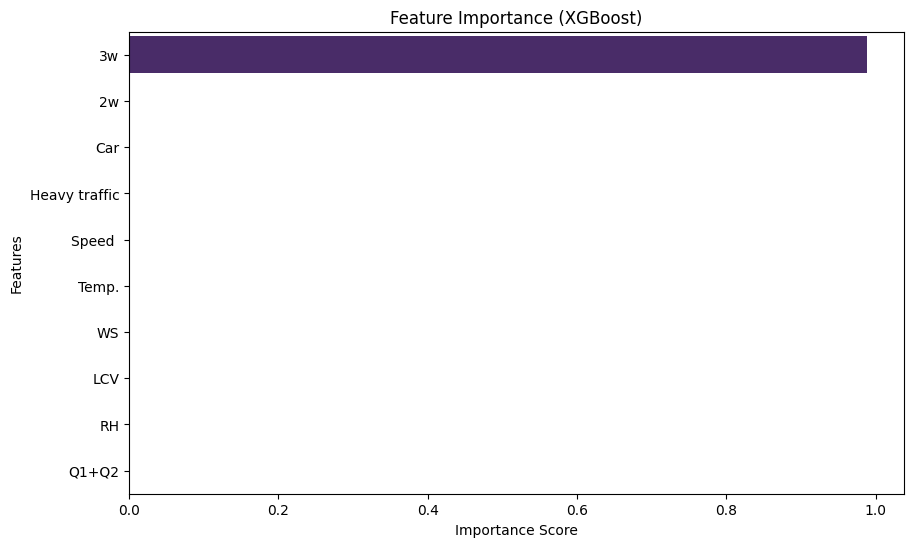

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\3239680649.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


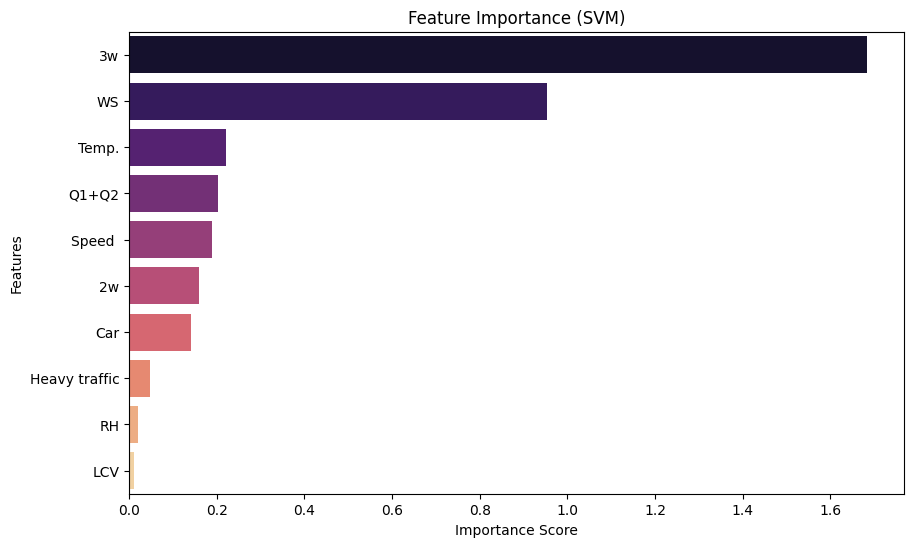

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\3239680649.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


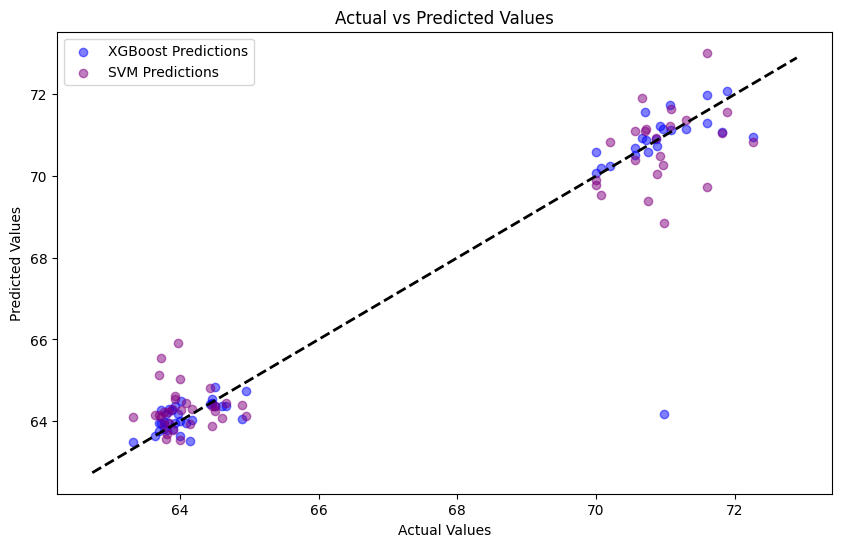

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Define features (X) and target (y)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['L90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- XGBoost Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()



C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
ANN Results:
MSE: 24.597327556820414
MAE: 3.2447814810645066
RMSE: 4.959569291462759
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1272042260.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


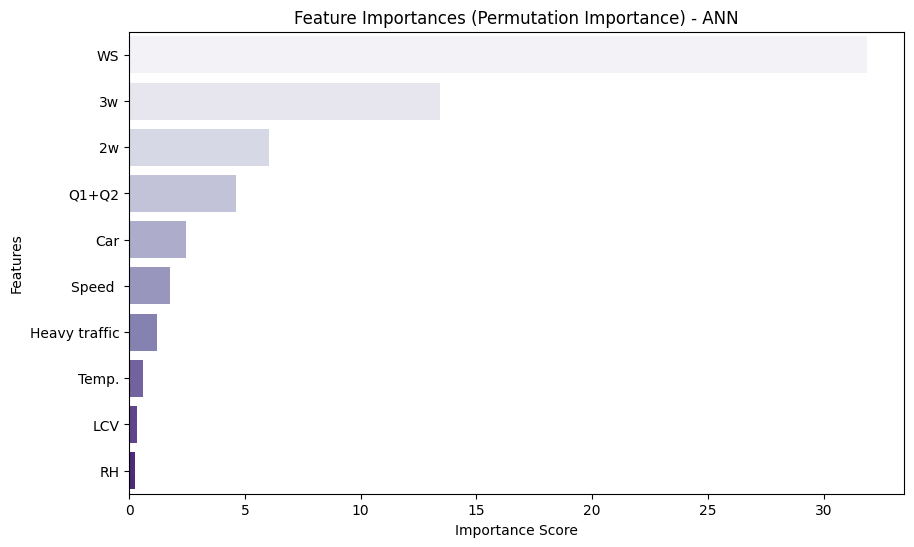

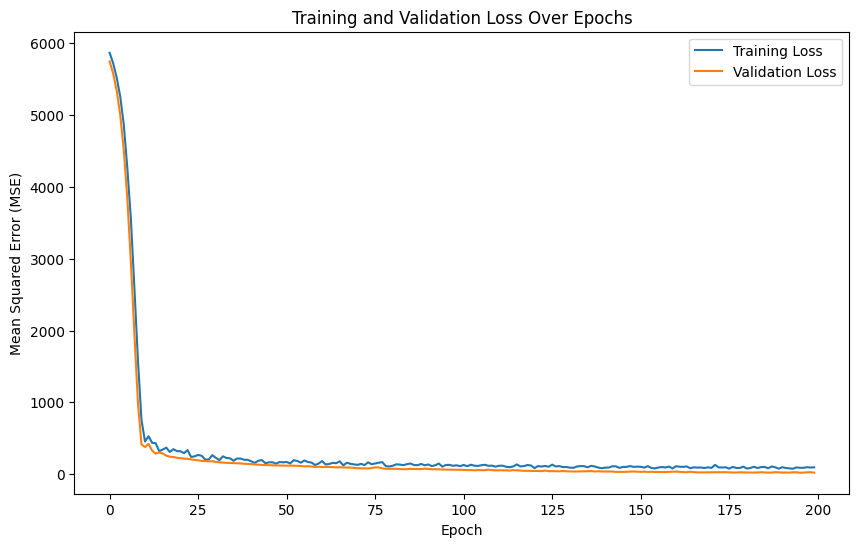

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1272042260.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


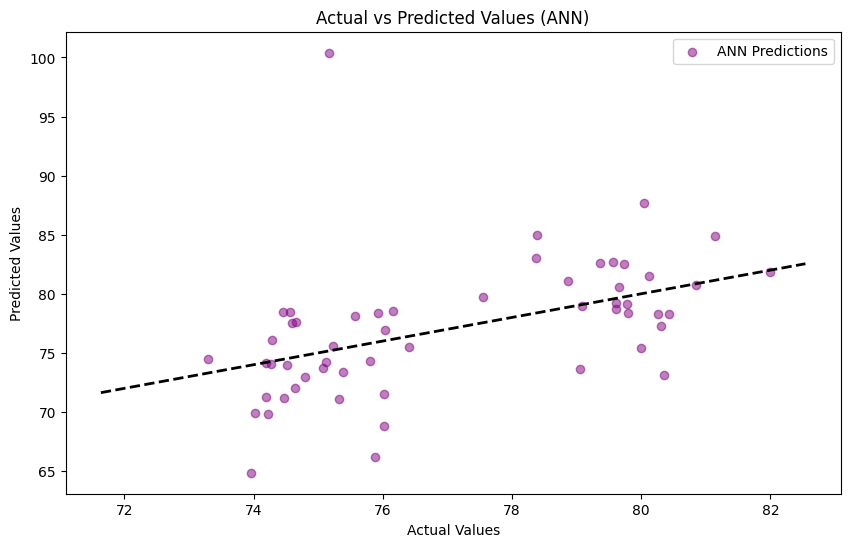

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")


import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()


C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
ANN Results:
MSE: 52.09970548862186
MAE: 4.818321469578252
RMSE: 7.218012571935703
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1302827295.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


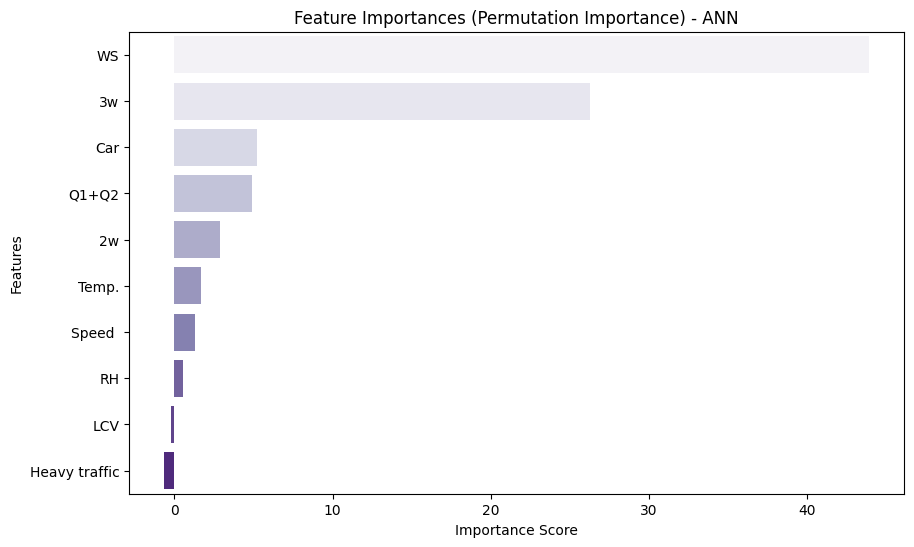

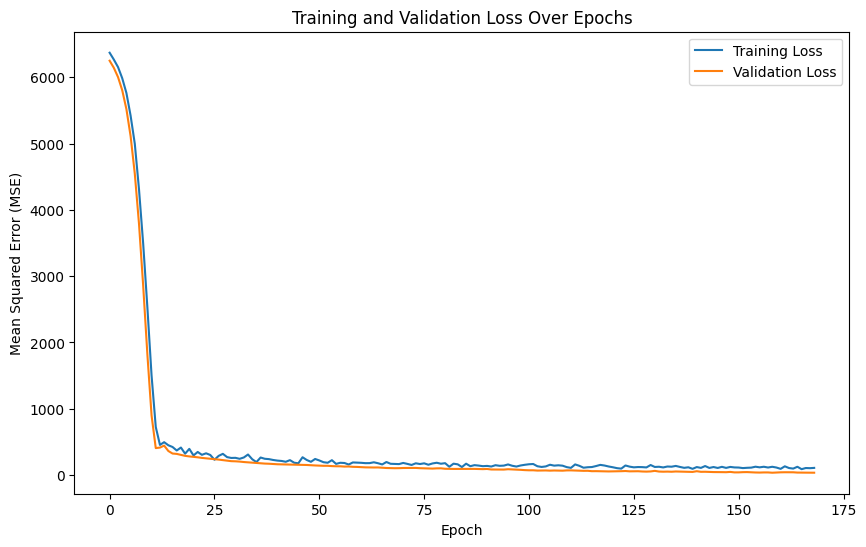

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1302827295.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


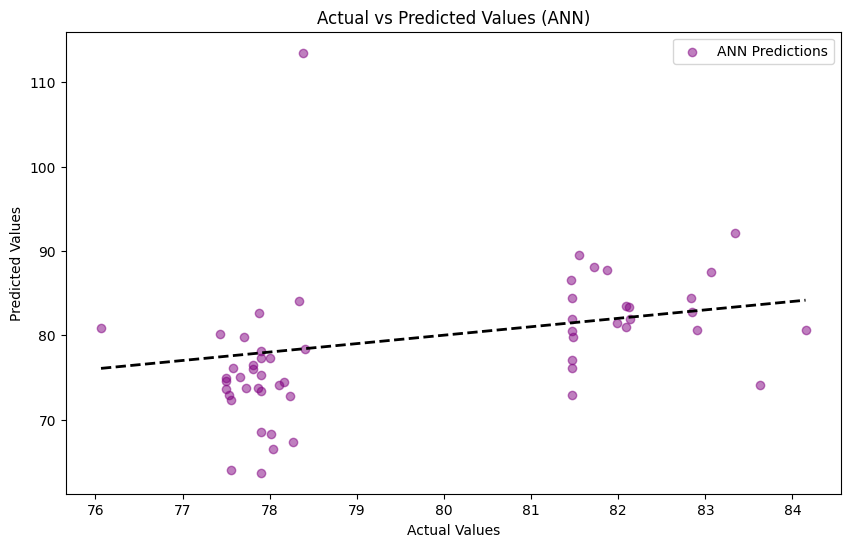

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['L10']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")


import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()


C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
ANN Results:
MSE: 33.129721392271485
MAE: 3.911346399258487
RMSE: 5.755842370346106
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1018983356.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


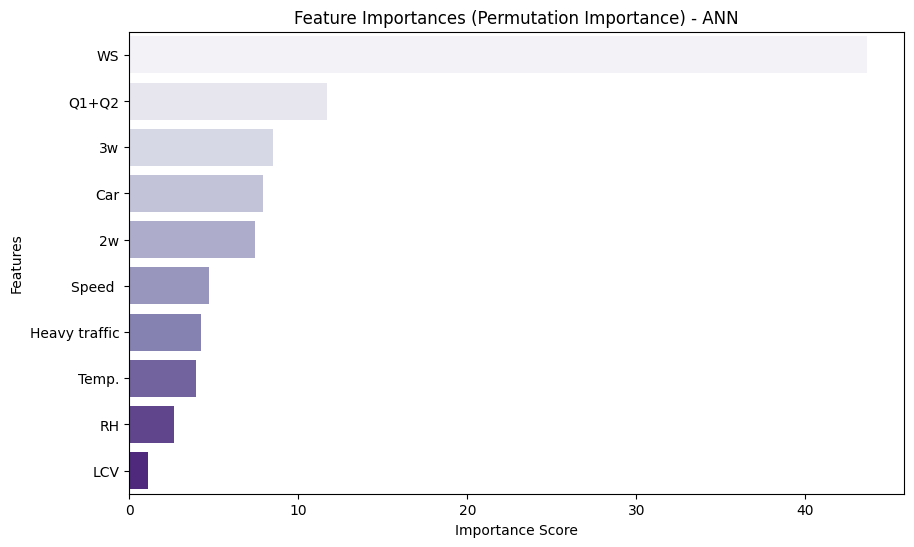

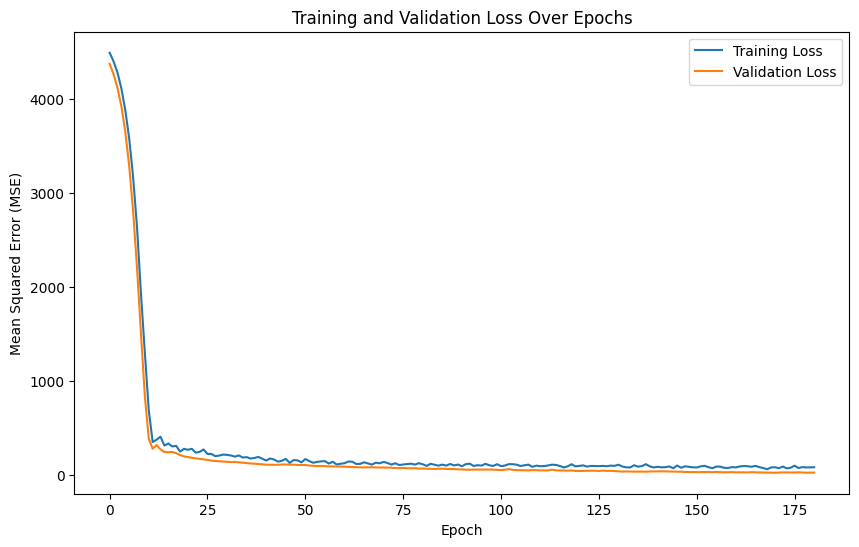

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1018983356.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


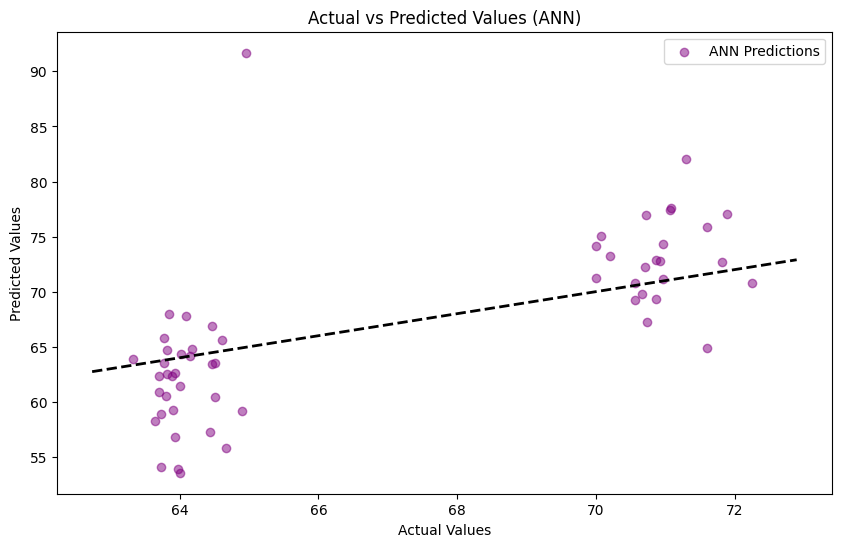

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Concrete pavement data for analysis.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data[['Q1+Q2', 'Speed ', 'Car', '2w', '3w', 'LCV', 'Heavy traffic', 'Temp.', 'RH', 'WS']]
y = data['L90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")


import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()


Decision Tree Results:
MSE: 0.03145096740211997, MAE: 0.03266479137100446, RMSE: 0.17734420600098547
Feature Importance (Decision Tree):
250Hz    0.717757
4 kHz    0.218754
125Hz    0.028826
500Hz    0.017353
2 kHz    0.017310
dtype: float64

Random Forest Results:
MSE: 0.01799507109116072, MAE: 0.03256491828738696, RMSE: 0.13414570843363094
Feature Importance (Random Forest):
500Hz    0.330375
4 kHz    0.293427
250Hz    0.283141
2 kHz    0.056775
125Hz    0.036282
dtype: float64

Accuracy (R² Scores):
Decision Tree R²: 0.9929477928350563
Random Forest R²: 0.9959649899584901


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1285372212.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")


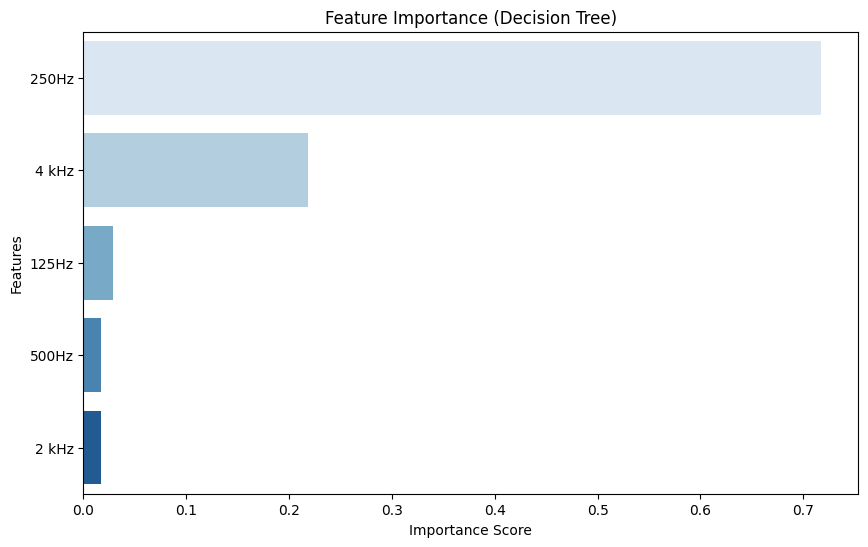

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1285372212.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")


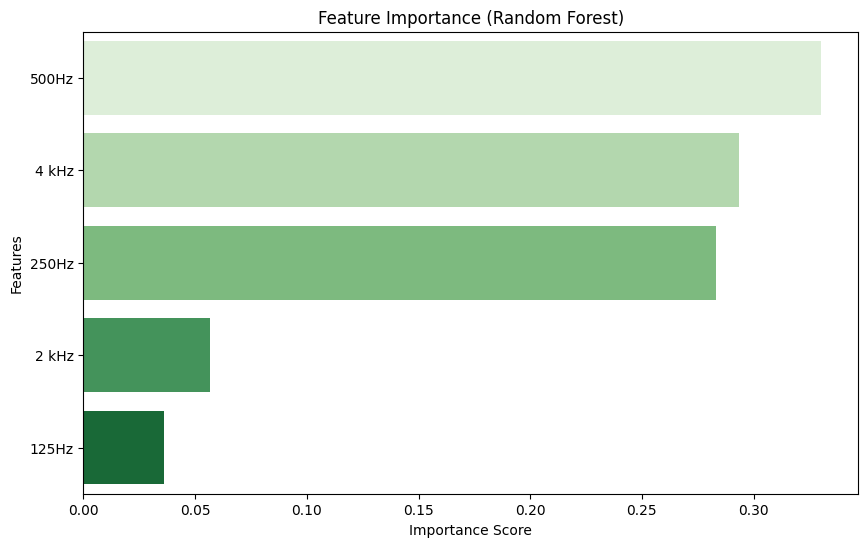

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1285372212.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


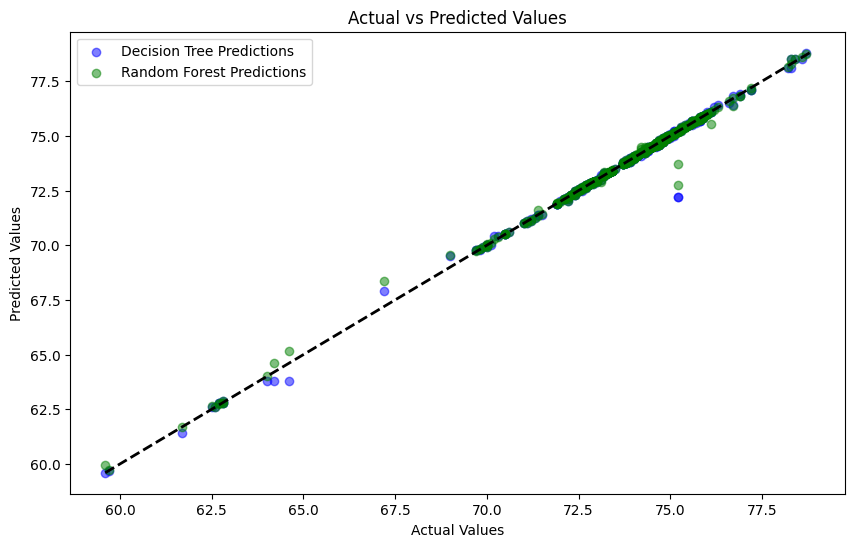

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/frequency data.xlsx"
data = pd.read_excel(file_path)

# Defining the features (all columns except Leq) and target (Leq)
X = data[['125Hz', '250Hz', '500Hz', '2 kHz', '4 kHz']]
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Decision Tree Results:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}")
print("Feature Importance (Decision Tree):")
print(feature_importance_dt)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE, MAE, RMSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature importance for Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Results:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}")
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Calculate R² (Accuracy) for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate R² (Accuracy) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print("\nAccuracy (R² Scores):")
print(f"Decision Tree R²: {r2_dt}")
print(f"Random Forest R²: {r2_rf}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Decision Tree Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, palette="Blues")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Random Forest Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette="Greens")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()



XGBoost Results:
MSE: 0.03222375018859911, MAE: 0.04496311164764065, RMSE: 0.1795097495641925
Feature Importance (XGBoost):
250Hz    0.665951
4 kHz    0.245074
500Hz    0.052191
125Hz    0.021823
2 kHz    0.014961
dtype: float32

SVM Results:
MSE: 0.20865474143720292, MAE: 0.199185153788696, RMSE: 0.4567874138340536
Feature Importance (SVM):
2 kHz    1.354490
500Hz    0.514895
4 kHz    0.499014
250Hz    0.129240
125Hz    0.030787
dtype: float64

Accuracy (R² Scores):
XGBoost R²: 0.9927745128136798
SVM R²: 0.9532136342978207


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\2596908349.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")


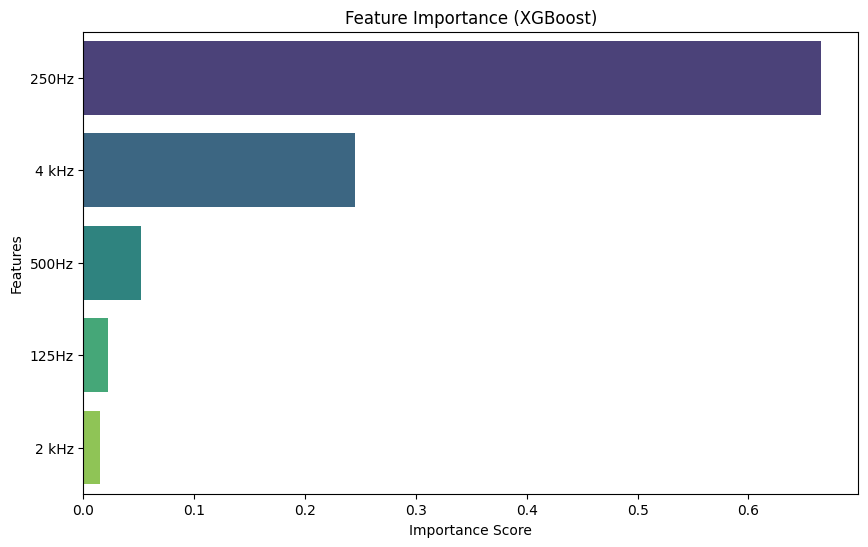

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\2596908349.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")


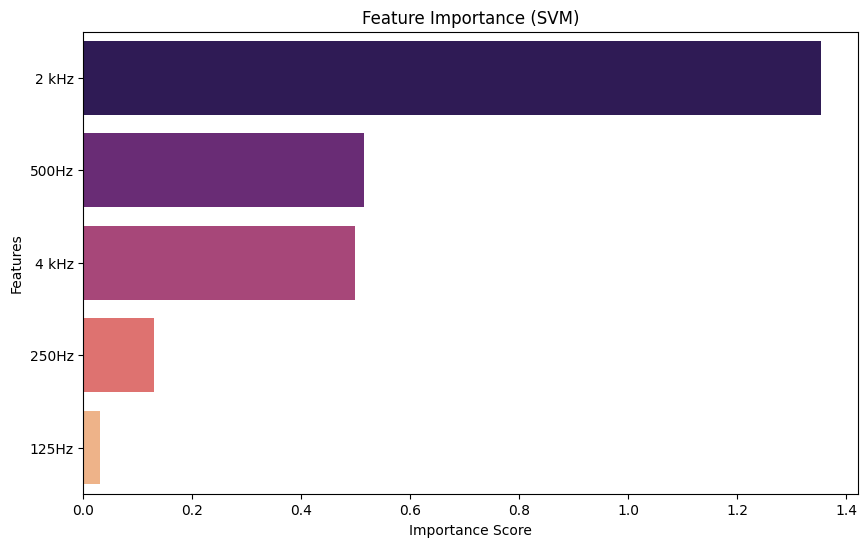

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\2596908349.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


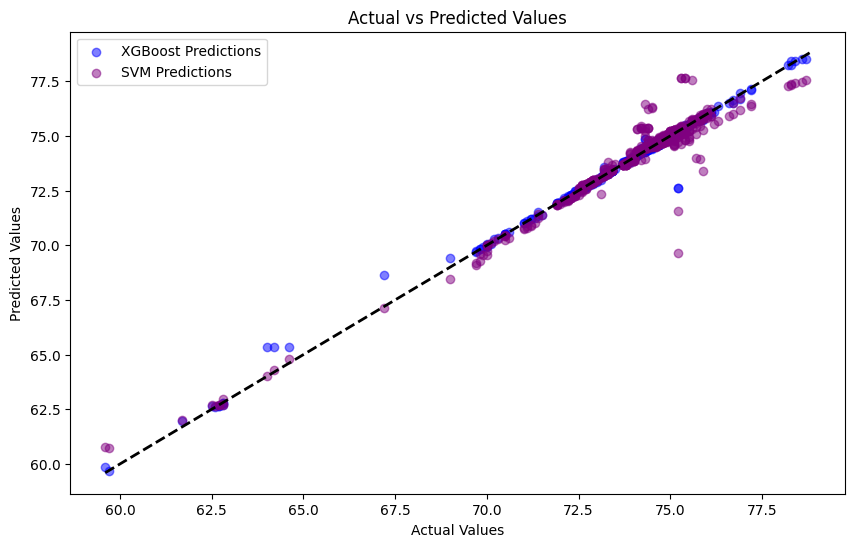

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/frequency data.xlsx"
data = pd.read_excel(file_path)

# Define features (X) and target (y)
X = data[['125Hz', '250Hz', '500Hz', '2 kHz', '4 kHz']]
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- XGBoost Regressor ----------------- #

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE, MAE, RMSE for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Feature importance for XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Results:")
print(f"MSE: {mse_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")
print("Feature Importance (XGBoost):")
print(feature_importance_xgb)

# ----------------- SVM Regressor ----------------- #

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate MSE, MAE, RMSE for SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Feature importance for SVM (absolute values of coefficients)
feature_importance_svm = pd.Series(abs(svm_model.coef_[0]), index=X.columns).sort_values(ascending=False)

print("\nSVM Results:")
print(f"MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")
print("Feature Importance (SVM):")
print(feature_importance_svm)

# Calculate R² (Accuracy) for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate R² (Accuracy) for SVM
r2_svm = r2_score(y_test, y_pred_svm)

print("\nAccuracy (R² Scores):")
print(f"XGBoost R²: {r2_xgb}")
print(f"SVM R²: {r2_svm}")


# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- XGBoost Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_xgb, y=feature_importance_xgb.index, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- SVM Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_svm, y=feature_importance_svm.index, palette="magma")
plt.title("Feature Importance (SVM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Plot Actual vs Predicted for both models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_svm, color="purple", alpha=0.5, label="SVM Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()



C:\Users\Alok Kumar Pandey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ANN Results:
MSE: 1.2466871506157733
MAE: 0.8787438496049628
RMSE: 1.1165514545312156
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1170958279.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")


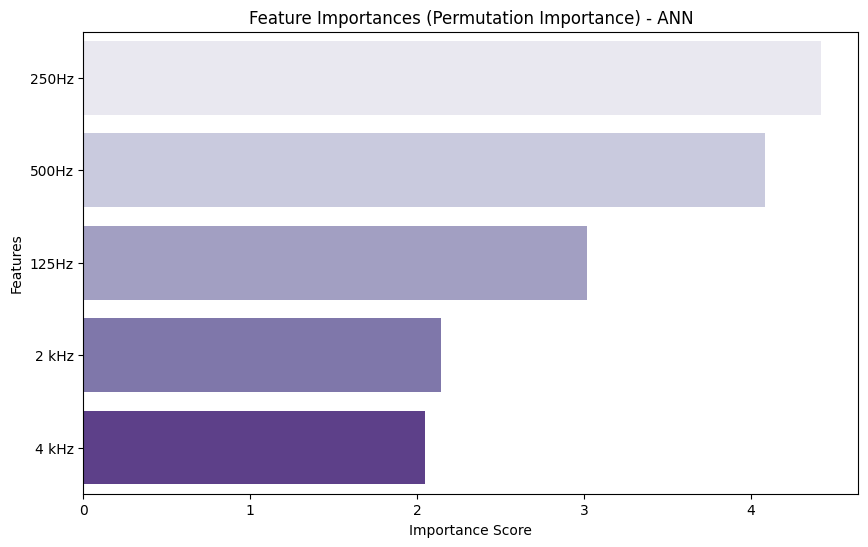

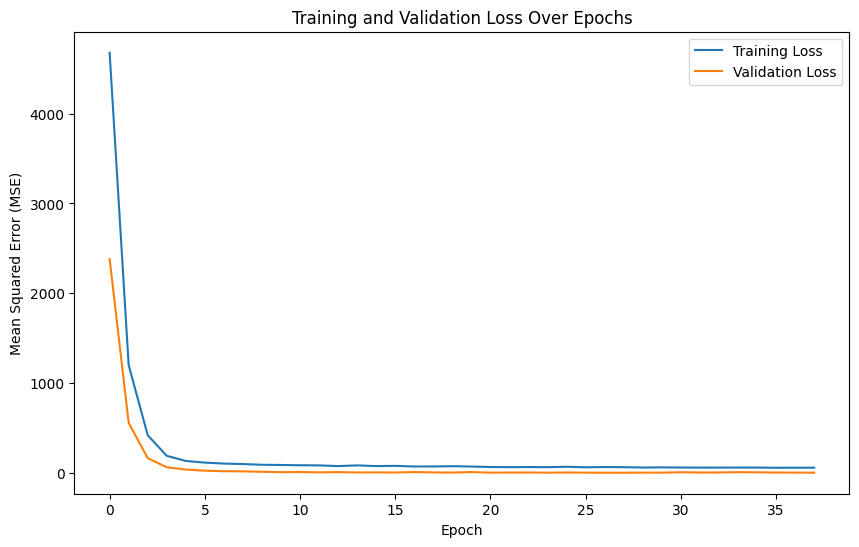

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_20884\1170958279.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction


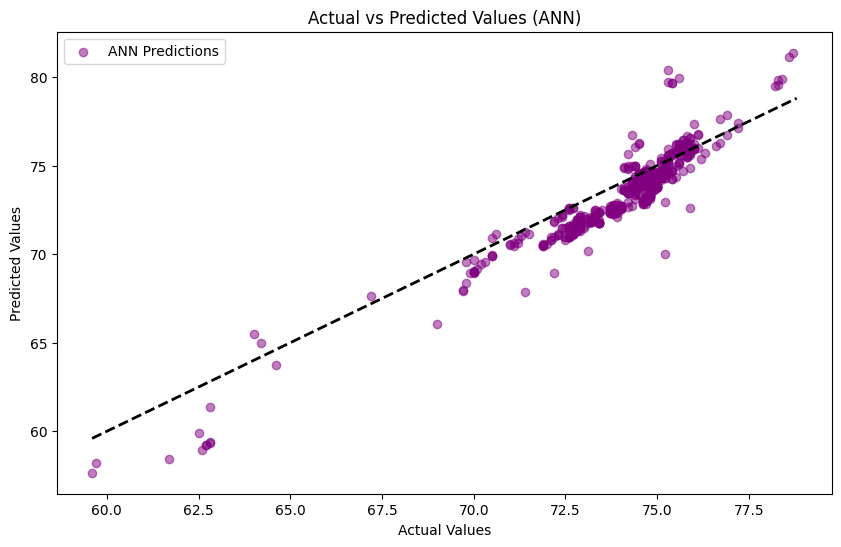

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

# Set random seeds for reproducibility
np.random.seed(42)  # For NumPy
tf.random.set_seed(42)  # For TensorFlow

# Load the data (replace with your file path)
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/frequency data.xlsx"
data = pd.read_excel(file_path)

# Convert columns with string numbers to proper numeric values
data = data.replace(',', '.', regex=True)  # Replace commas with dots for decimal separation

# Defining the features (all columns except Leq) and target (Leq)
X = data[['125Hz', '250Hz', '500Hz', '2 kHz', '4 kHz']]
y = data['Leq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex ANN model with dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),  # More neurons
    layers.Dropout(0.3),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate for Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the MSE, MAE, and RMSE
mse_ann = mean_squared_error(y_test, y_pred)
mae_ann = mean_absolute_error(y_test, y_pred)
rmse_ann = np.sqrt(mse_ann)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}")

# Create a wrapper class for the Keras model to use with sklearn's permutation_importance
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y, epochs=100, verbose=0):
        self.model.fit(X, y, epochs=epochs, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))  # Returning negative MSE as score

# Wrap the Keras model
wrapped_model = KerasRegressorWrapper(model)

# Fit the wrapped model
wrapped_model.fit(X_train_scaled, y_train)

# Apply permutation importance on the trained ANN model
perm_importance = permutation_importance(wrapped_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Displaying feature importances
feature_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Permutation Importance):")
print(feature_importances)

# Calculate R² (Accuracy) for ANN
r2_ann = r2_score(y_test, y_pred)

print(f"ANN Results:\nMSE: {mse_ann}\nMAE: {mae_ann}\nRMSE: {rmse_ann}\nR²: {r2_ann}")


import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Feature Importance Plot ----------------- #

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="Purples")
plt.title("Feature Importances (Permutation Importance) - ANN")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ----------------- Training History Plot ----------------- #

# Plot training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


# ----------------- Actual vs Predicted Plot ----------------- #

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple", label="ANN Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="black")  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (ANN)")
plt.legend()
plt.show()
